<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [824]:
import pandas as pd
import matplotlib.pyplot as plt 


In [825]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [826]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [827]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [828]:
random_state_number = 10
sample_size_number = 5
data.sample(n=sample_size_number, random_state=random_state_number)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22564,6,4100000.0,55.0,2016-03-15T00:00:00,2,NaN,12.0,32.0,1,NaN,...,NaN,0.0,Санкт-Петербург,15760.0,15976.0,1.0,719.0,0.0,NaN,183.0
16617,12,6800000.0,69.0,2018-11-08T00:00:00,2,2.9,5.0,42.0,2,NaN,...,13.0,NaN,Санкт-Петербург,31276.0,5131.0,2.0,172.0,2.0,482.0,107.0
11628,0,6400000.0,60.4,2016-02-19T00:00:00,2,NaN,5.0,38.6,5,NaN,...,8.0,0.0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,188.0
1984,1,6250000.0,61.0,2016-06-17T00:00:00,3,NaN,9.0,44.0,5,NaN,...,6.3,0.0,Санкт-Петербург,48175.0,16156.0,0.0,NaN,0.0,NaN,60.0
18017,0,1700000.0,43.7,2017-09-04T00:00:00,2,2.6,5.0,31.1,1,NaN,...,5.3,0.0,поселок Мичуринское,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [829]:
data.info()
# запрос общей информации о дата-фрейме с помощью метода .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [830]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [831]:
data.duplicated().sum()
#проверим количество дубликатов в дата-сете 

0

### Вывод

В таблице 22 столбца. Мы наблюдаем 4 вида данных - `float`, `int64` и `object` и `bool`.
В наименовании столбцов видим склеенные значения а также чередование букв верхнего и нижнего регистров.

Количество значений в столбцах различается. 
Имеются пропущенные значения в следующих столбцах:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition



## Предобработка данных

1. В названиях колонок видны следующие нарушения стиля: строчные буквы сочетаются с прописными, отсутствует разделение с помощью нижнего подчеркивания.

In [832]:
#print(data.columns)
# вывод на экран заголовков дата-фрейма с помощью атрибута columns

header = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']

data = pd.DataFrame(data = data, columns = header)
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest', 
                              'parks_around3000': 'parks_around_3000',
                              'ponds_around3000': 'ponds_around_3000'})

# сохранение списка названия столбцов в переменной header
# сохранение структуры данных в переменной data
# метод rename() для переименования столбцов

#print(data.columns)
# вывод на экран заголовков дата-фрейма с помощью атрибута columns после замены для проверки

2. Рассмотрим количество пропущенных значений относительно всего дата-сета. 
Пропуски выглядят не сильно критичными. Заполняя форму с объявлением, люди могут владеть недостаточной информацией (например не знают расстояние до ближайшего парка или водоема, либо им кажется данная информация не критичной для выбора квартиры, чтобы добавлять ее в объявление).

In [833]:
print(data.isna().sum().sort_values()/len(data)*100)

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around_3000       23.283683
parks_around_3000       23.283683
city_centers_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64


3. Рассмотрим столбец 'locality_name'. В данном столбще отсутствует 49 значений, что составляет около 2% всей выборки. Удалим данные значения, так как вероятно, что объявления без данных о местоположении недвижимости пользователи не будут рассматривать.

In [834]:
data.dropna(subset=['locality_name'], inplace=True)
display(data[data['locality_name'].isna()].head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


4. Рассмотрим столбец 'balcony'. Отсутствующие в данном столбце значения скорее всего говорят о том, что в данных объявлениях, в квартирах, отсутствуют балконы. Заменим пропущенные значения на нули.

In [835]:
data['balcony'] = data['balcony'].fillna(0)
display(data[data['balcony'].isna()].head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


5. Рассмотрим столбец 'is_apartment'. Отсутствующие в данном столбце значения скорее всего говорят о том, что в данных объявлениях, квартиры не являются апартаментами. Заменим пропущенные значения на False.

In [836]:
data['is_apartment'] = data['is_apartment'].fillna(False)
display(data[data['is_apartment'].isna()].head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


6. Рассмотрим столбец с датой публикации 'first_day_exposition'. Дата в формате `2019-03-07T00:00:00`. Приведем данные к стандартному виду.

In [837]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [838]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


7. Рассмотрим столбец 'days_exposition' — сколько дней было размещено объявление (от публикации до снятия). В данном столбце имееются пропуски. Заменим пропущенные данные на медианные.

In [839]:
#заполним пропуски в столбце 'days_exposition' с помощью метода fillna() на медианные
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())


8. Добавим новые столбцы со значения в столбцах city_centers_nearest, airports_nearest, ponds_nearest, parks_nearest в километрах.


In [840]:
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()
data['airports_nearest_km'] = (data['airports_nearest']/1000).round()
data['ponds_nearest_km'] = (data['ponds_nearest']/1000).round()
data['parks_nearest_km'] = (data['parks_nearest']/1000).round()

#добавили столбцы в км, округлили значения

In [841]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,city_centers_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,95.0,16.0,19.0,1.0,0.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,19.0,13.0,NaN,NaN
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,14.0,22.0,1.0,0.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,7.0,28.0,0.0,0.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,8.0,32.0,0.0,0.0


9. Заменим тип данных в столбце с количеством балконов а также с количеством дней размещения публикации. 

In [842]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 26 columns):
total_images               23650 non-null int64
last_price                 23650 non-null float64
total_area                 23650 non-null float64
first_day_exposition       23650 non-null datetime64[ns]
rooms                      23650 non-null int64
ceiling_height             14490 non-null float64
floors_total               23565 non-null float64
living_area                21752 non-null float64
floor                      23650 non-null int64
is_apartment               23650 non-null bool
studio                     23650 non-null bool
open_plan                  23650 non-null bool
kitchen_area               21381 non-null float64
balcony                    23650 non-null float64
locality_name              23650 non-null object
airports_nearest           18116 non-null float64
city_centers_nearest       18139 non-null float64
parks_around_3000          18140 non-null float64


In [843]:
data = data.astype({'balcony': 'int8',
                    'days_exposition': 'int32',
                    'total_images': 'int8',
                    'rooms': 'int8',
                    'ceiling_height': 'float16'})

In [844]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 26 columns):
total_images               23650 non-null int8
last_price                 23650 non-null float64
total_area                 23650 non-null float64
first_day_exposition       23650 non-null datetime64[ns]
rooms                      23650 non-null int8
ceiling_height             14490 non-null float16
floors_total               23565 non-null float64
living_area                21752 non-null float64
floor                      23650 non-null int64
is_apartment               23650 non-null bool
studio                     23650 non-null bool
open_plan                  23650 non-null bool
kitchen_area               21381 non-null float64
balcony                    23650 non-null int8
locality_name              23650 non-null object
airports_nearest           18116 non-null float64
city_centers_nearest       18139 non-null float64
parks_around_3000          18140 non-null float64
parks

### Вывод

Мы исправили названия колонок, заменили/удалили значения из выборки, где это было релевантно. Привели данные к нужному типу.

## Расчёты и добавление результатов в таблицу

1. Рассчитаем цену квадратного метра.

In [845]:
data['sq_metres_price'] = data['last_price']/data['total_area']
data['sq_metres_price'] = data['sq_metres_price'].round(3)

2. Добавим столбцы с днем недели, месяцем и годом побликации.

In [846]:
data['type_day_exposition'] = data['first_day_exposition'].dt.weekday
data['type_month_exposition'] = data['first_day_exposition'].dt.month
data['type_year_exposition'] = data['first_day_exposition'].dt.year


In [847]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 30 columns):
total_images               23650 non-null int8
last_price                 23650 non-null float64
total_area                 23650 non-null float64
first_day_exposition       23650 non-null datetime64[ns]
rooms                      23650 non-null int8
ceiling_height             14490 non-null float16
floors_total               23565 non-null float64
living_area                21752 non-null float64
floor                      23650 non-null int64
is_apartment               23650 non-null bool
studio                     23650 non-null bool
open_plan                  23650 non-null bool
kitchen_area               21381 non-null float64
balcony                    23650 non-null int8
locality_name              23650 non-null object
airports_nearest           18116 non-null float64
city_centers_nearest       18139 non-null float64
parks_around_3000          18140 non-null float64
parks

3. Добавим столбец с градацией по этажам: первый, последний, другой.

In [848]:
def floor_group(row):
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total_floor:
        return 'последний'
    else:
        return 'другой'

data['floor_group'] = data.apply(floor_group, axis=1)

4. Рассчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [849]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['living_area_ratio'] = data['living_area_ratio'].round(3)
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area_ratio'].round(3)

In [850]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest_km,ponds_nearest_km,parks_nearest_km,sq_metres_price,type_day_exposition,type_month_exposition,type_year_exposition,floor_group,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.699219,16.0,51.0,8,False,...,19.0,1.0,0.0,120370.370,3,3,2019,другой,0.472,0.231
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,13.0,NaN,NaN,82920.792,1,12,2018,первый,0.460,0.272
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,22.0,1.0,0.0,92785.714,3,8,2015,другой,0.612,0.148
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,28.0,0.0,0.0,408176.101,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.029297,14.0,32.0,13,False,...,32.0,0.0,0.0,100000.000,1,6,2018,другой,0.320,0.410


### Вывод

Мы посчитали и добавили в таблицу следующие параметры: 
- цена квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

1. Рассмотрим полученные данные. Из таблицы ниже видим, что имеются необычные объекты, где максимальная площадь равна 900 кв.м., количество комнат - 19, цена за квартиру 763 млн., а высота потолков - 100 м.	Изучим данные параметры а также построим гистограммы. 


In [851]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,city_centers_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km,sq_metres_price,type_day_exposition,type_month_exposition,type_year_exposition,living_area_ratio,kitchen_area_ratio
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,...,18139.000000,18116.000000,9085.000000,8064.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,21752.000000,21381.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771484,10.675875,34.448356,5.893277,10.566403,0.591712,...,14.191576,28.809229,0.503027,0.441840,9.943225e+04,2.568710,6.401564,2017.370021,0.564748,0.187369
std,5.682278,1.089640e+07,35.661808,1.078620,1.261719,6.594823,22.037664,4.883317,5.901753,0.959662,...,8.614645,12.639962,0.500018,0.545661,5.033794e+04,1.788808,3.491418,1.037806,0.105388,0.072975
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.118350e+02,0.000000,1.000000,2014.000000,0.022000,0.025000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.519531,5.000000,18.600000,2.000000,7.000000,0.000000,...,9.000000,19.000000,0.000000,0.000000,7.661497e+04,1.000000,3.000000,2017.000000,0.495000,0.133000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650391,9.000000,30.000000,4.000000,9.100000,0.000000,...,13.000000,27.000000,1.000000,0.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.568000,0.172000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800781,16.000000,42.300000,8.000000,12.000000,1.000000,...,16.000000,37.000000,1.000000,1.000000,1.142742e+05,4.000000,10.000000,2018.000000,0.638000,0.232000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,66.000000,85.000000,1.000000,3.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.788000


Text(0.5, 1.0, 'Last price histogram')

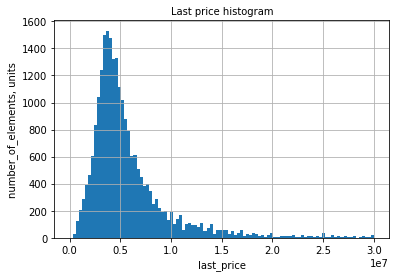

In [852]:
data['last_price'].hist(bins=100,range=(0,30000000))
plt.xlabel('last_price')
plt.ylabel('number_of_elements, units')
plt.title("Last price histogram", fontsize=10)


Из графика видим, что больше всего объявлений с квартирами, цена которых находится в диапазоне е от 3 до 4.5 млн. руб.

Text(0.5, 1.0, 'Total area histogram')

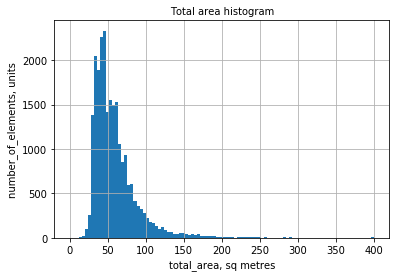

In [853]:
data['total_area'].hist(bins=100, range=(0,400))
plt.xlabel('total_area, sq metres')
plt.ylabel('number_of_elements, units')
plt.title("Total area histogram", fontsize=10)


Чаще всего продаются квартиры с площадью от 40 до 45 кв.м.

Text(0.5, 1.0, 'Number of rooms histogram')

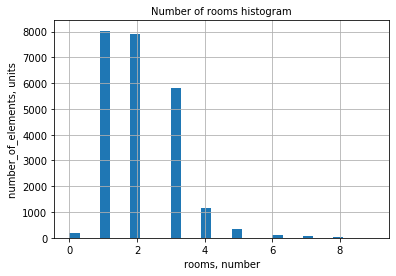

In [854]:
data['rooms'].hist(bins=30, range=(0,9))
plt.xlabel('rooms, number')
plt.ylabel('number_of_elements, units')
plt.title("Number of rooms histogram", fontsize=10)


Больше всего в объявлениях представлены однокомнатные и двухкомнатные квартиры.

Text(0.5, 1.0, 'Ceiling height histogram')

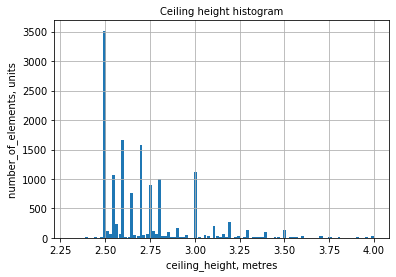

In [855]:
data['ceiling_height'].hist(bins=100, range=(2.3,4))
plt.xlabel('ceiling_height, metres')
plt.ylabel('number_of_elements, units')
plt.title("Ceiling height histogram", fontsize=10)

Наиболее популярны и скорее всего стандартны квартиры с высотой потолка в 2.5 метра.

2. Изучим столбец с временем продажи квартир. Построим гисторгамму, посчитаем среднее и медиану.

Text(0.5, 1.0, 'Days exposition histogram')

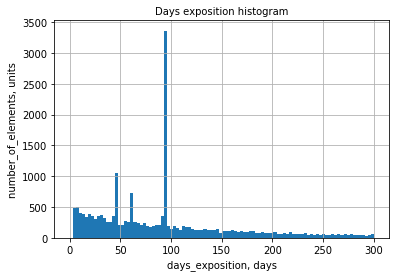

In [856]:
data['days_exposition'].hist(bins=100, range=(0,300))
plt.xlabel('days_exposition, days')
plt.ylabel('number_of_elements, units')
plt.title("Days exposition histogram", fontsize=10)

Text(0.5, 1.0, 'Days exposition histogram')

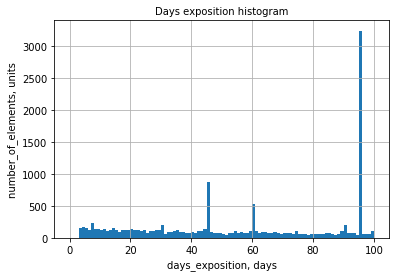

In [857]:
data['days_exposition'].hist(bins=100, range=(0,100))
plt.xlabel('days_exposition, days')
plt.ylabel('number_of_elements, units')
plt.title("Days exposition histogram", fontsize=10)

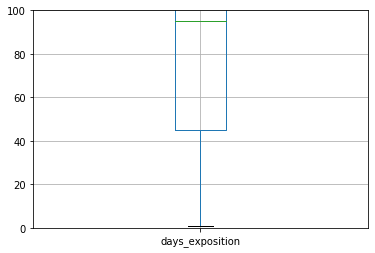

In [858]:
plt.ylim(0,100)
data.boxplot(column='days_exposition') 
plt.show()

Больше всего продаж на 95 дни. Т.е по объявлениям которым около 3х месяцев.

In [859]:
data['days_exposition'].describe()

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

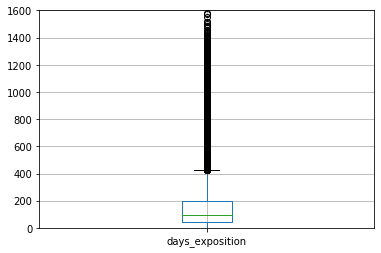

In [860]:
plt.ylim(0,1600)
data.boxplot(column='days_exposition') 
plt.show()
#построим диаграмму размаха для столбца 'days_exposition' со всеми входящими значениями

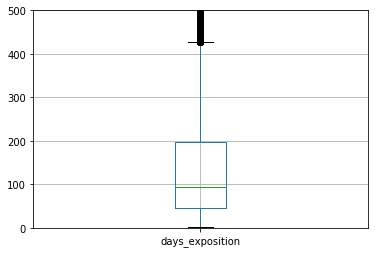

In [861]:
plt.ylim(0,500)
data.boxplot(column='days_exposition') 
plt.show()

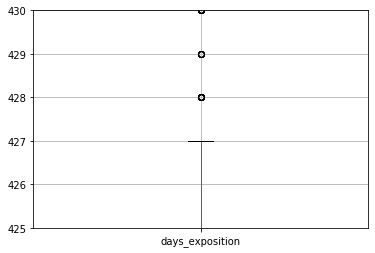

In [862]:
plt.ylim(425,430)
data.boxplot(column='days_exposition') 
plt.show()
#увеличим масштаб, чтобы увидеть более точные значения

Исходя из построенных гистограммы, диаграмм размаха видим - в среднем квартиры продавали на 95 день. Исходя из того, что в размах «усов» попадают нормальные значения, будем считать, что максимальный день продаж составляет 427 день, минимальный - сразу, после размещения объявления. Очень много значений попадает в область за пределами 1.5 межквартильного размаха. Уберем выбивающиеся значения.


Text(0.5, 1.0, 'Days exposition histogram')

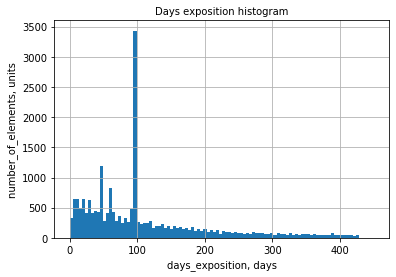

In [863]:
good_days_exposition_data = data.query('days_exposition < 427')
good_days_exposition_data['days_exposition'].hist(bins=100, range=(0,450))
plt.xlabel('days_exposition, days')
plt.ylabel('number_of_elements, units')
plt.title("Days exposition histogram", fontsize=10)

Итого наблюдаем несколько пиков: 45, 60, 95 - дни с максимальным количеством продаж квартир.

3. Проанализируем факторы, влияющие на стоимость квартиры.

In [864]:
good_days_exposition_data['last_price'].describe()

count    2.130000e+04
mean     6.378613e+06
std      1.077982e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      7.630000e+08
Name: last_price, dtype: float64

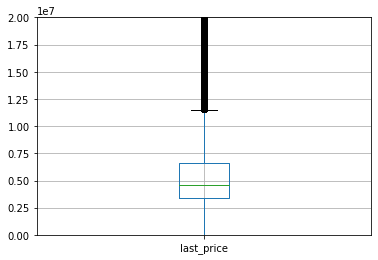

In [865]:
plt.ylim(0,20000000)
good_days_exposition_data.boxplot(column='last_price') 
plt.show()
#построим диаграмму размаха для отфильтрованных данных

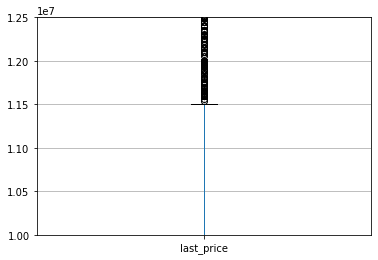

In [866]:
plt.ylim(10000000,12500000)
good_days_exposition_data.boxplot(column='last_price') 
plt.show()
#увеличим масштаб

Из диаграммы размаха видим, что медианное значение стоимости квартиры составляет 4.6 млн. руб. 
Отклоняющие значения (попадающие в область за пределами 1.5 межквартального размаха) начинаются со значения 11.5 млн. руб. 

In [867]:
good_days_exposition_data.sort_values(by='last_price', ascending=True).head(10)
#рассмотрим варианты с минимальными ценами

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest_km,ponds_nearest_km,parks_nearest_km,sq_metres_price,type_day_exposition,type_month_exposition,type_year_exposition,floor_group,living_area_ratio,kitchen_area_ratio
8793,7,12190.0,109.0,2019-03-20,2,2.750000,25.0,32.0,25,False,...,36.0,NaN,1.0,111.835,2,3,2019,последний,0.294,0.372
14911,5,430000.0,54.0,2018-06-26,2,NaN,3.0,NaN,3,False,...,NaN,NaN,NaN,7962.963,1,6,2018,последний,NaN,NaN
17456,7,430000.0,30.4,2019-04-22,1,NaN,2.0,16.0,1,False,...,NaN,NaN,NaN,14144.737,0,4,2019,первый,0.526,0.197
16274,18,440000.0,40.0,2018-07-10,1,NaN,5.0,NaN,1,False,...,NaN,NaN,NaN,11000.000,1,7,2018,первый,NaN,NaN
5698,7,450000.0,42.0,2017-07-31,2,NaN,1.0,23.0,1,False,...,NaN,NaN,NaN,10714.286,0,7,2017,первый,0.548,0.138
9581,7,450000.0,43.4,2018-08-31,2,NaN,5.0,30.3,3,False,...,NaN,NaN,NaN,10368.664,4,8,2018,другой,0.698,0.127
16219,14,450000.0,38.5,2018-07-11,2,2.650391,2.0,NaN,1,False,...,NaN,NaN,NaN,11688.312,2,7,2018,первый,NaN,NaN
17676,0,450000.0,36.5,2018-02-01,1,NaN,5.0,17.3,4,False,...,NaN,NaN,NaN,12328.767,3,2,2018,другой,0.474,0.233
21912,0,470000.0,37.0,2018-02-18,1,NaN,3.0,NaN,3,False,...,NaN,NaN,NaN,12702.703,6,2,2018,последний,NaN,NaN
18867,1,470000.0,41.0,2018-02-11,1,NaN,5.0,32.0,3,False,...,NaN,NaN,NaN,11463.415,6,2,2018,другой,0.780,0.220


Исключим из данных те, в которых значение по цене выше 11.5 млн. руб. а также меньше 500 тыс. руб, т.к мы рассматриваем не только Санкт-Петербург но и соседние поселки, в них возможны квартиры с такой стоимостью.


In [868]:
good_days_exposition_and_price_data = good_days_exposition_data.query('5*10**5<last_price<11.5*10**6')

Проанализируем, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего).

- зависимость цены от квадратного метра (построим график зависимости цены в зависимости от площади квартиры, рассчитаем коэффициент Пирсона):

Text(0.5, 1.0, 'Dependence of the last price on the total area')

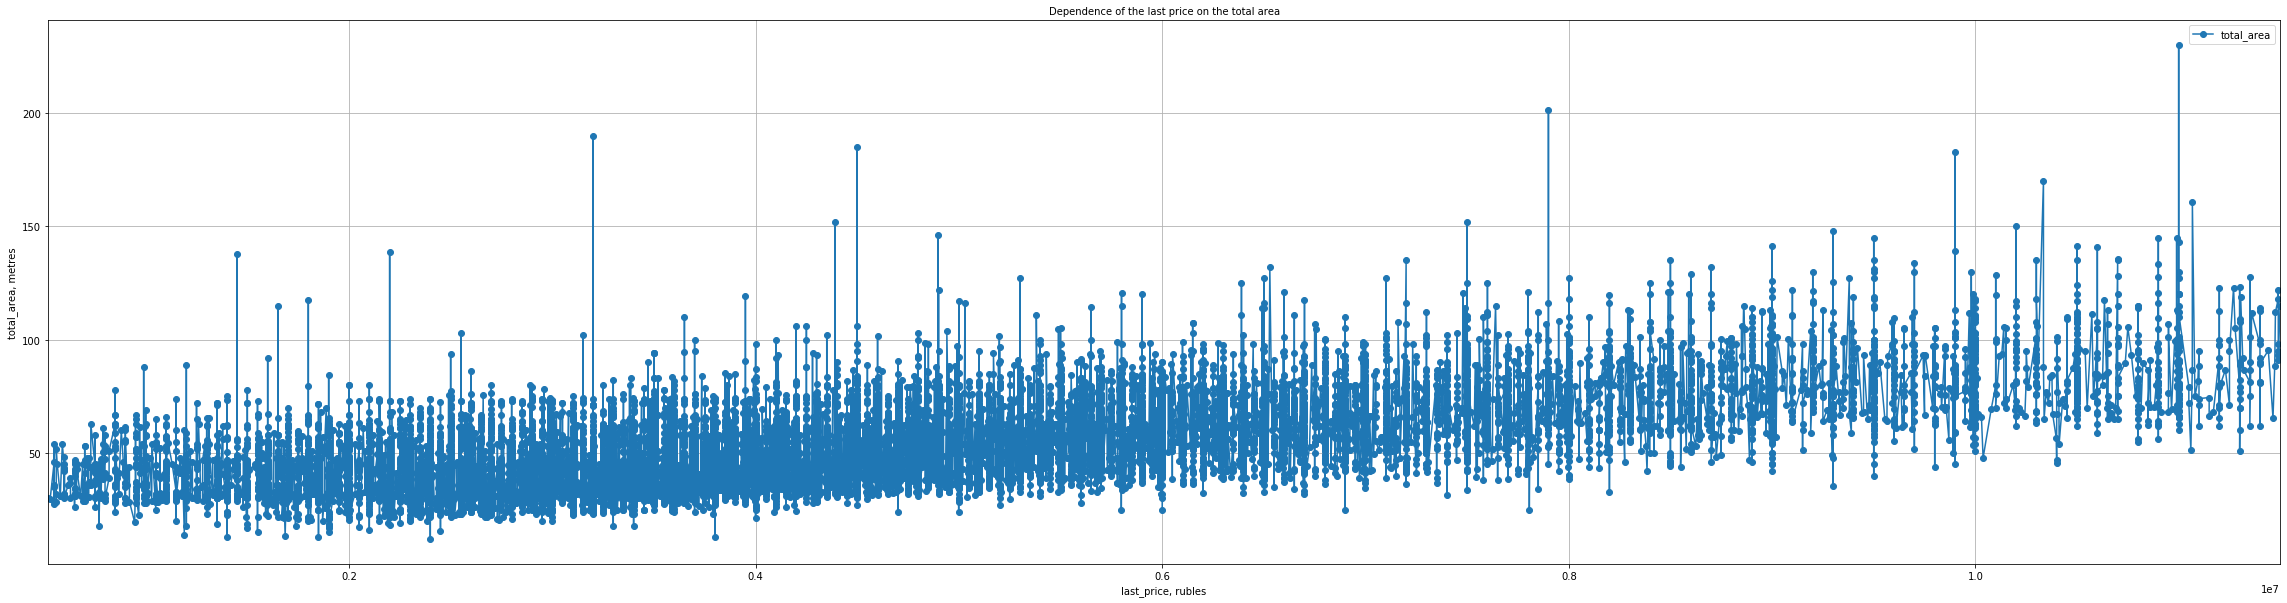

In [869]:
(good_days_exposition_and_price_data
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(40,10)))
plt.xlabel('last_price, rubles')
plt.ylabel('total_area, metres')
plt.title("Dependence of the last price on the total area", fontsize=10)

 Из графика видим положительную зависимость цены на квартиру от ее площади. Рассчитаем коэффициент Пирсона, чтобы убедиться в этом.

In [870]:
good_days_exposition_and_price_data['last_price'].corr(good_days_exposition_and_price_data['total_area'])

0.6853915941729608

Коэффициент равен 0.69, что говорит нам о достаточно сильной зависимости между данными величинами.

- зависимость цены от числа комнат (построим график зависимости средней цены в зависимости от количества комнат, рассчитаем коэффициент Пирсона):

Text(0.5, 1.0, 'Dependence of the last price on the number of rooms')

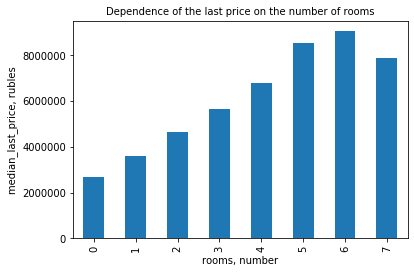

In [871]:
good_days_exposition_and_price_data.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',kind='bar')
plt.xlabel('rooms, number')
plt.ylabel('median_last_price, rubles')
plt.title("Dependence of the last price on the number of rooms", fontsize=10)

Из графика видим, что чем больше комнат - тем дороже квартира. Спад цены наблюдается только при количестве комнат больше 6, но данная особенность может быть связана с недостатком данных.

In [872]:
good_days_exposition_and_price_data['last_price'].corr(good_days_exposition_and_price_data['rooms'])

0.44397393897122045

Коэффициент равен 0.44, наблюдается положительная зависимость. 

- зависимость цены от этажа (построим график зависимости средней цены в зависимости от этажа, рассчитаем коэффициент Пирсона):

Text(0.5, 1.0, 'Dependence of the last price on the floor group')

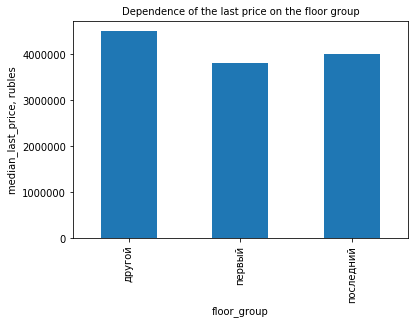

In [873]:
good_days_exposition_and_price_data.groupby('floor_group')['last_price'].median().plot(x='floor_group',y='last_price',kind='bar')
plt.xlabel('floor_group')
plt.ylabel('median_last_price, rubles')
plt.title("Dependence of the last price on the floor group", fontsize=10)

Из графика видим, что стоимость квартир не сильно зависит от этажа. Стоит только отметить, что цена за первый этаж ниже.

In [874]:
good_days_exposition_and_price_data['last_price'].corr(good_days_exposition_and_price_data['floor'])

0.14074649268901945

Коэффициент равен 0.14, зависимость есть, но небольшая. 

- зависимость от даты размещения: дня недели, месяца и года (построим график зависимости средней цены в зависимости от этажа, рассчитаем коэффициент Пирсона):

Text(0.5, 1.0, 'Dependence of the last price on the week day of exposition')

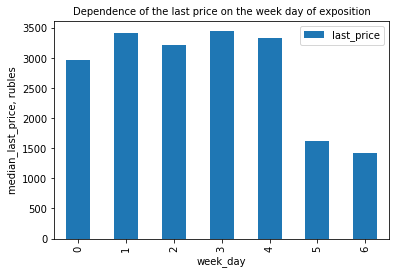

In [875]:
good_days_exposition_and_price_data.pivot_table(index ='type_day_exposition', values='last_price', aggfunc='count').plot(kind='bar')
plt.xlabel('week_day')
plt.ylabel('median_last_price, rubles')
plt.title("Dependence of the last price on the week day of exposition", fontsize=10)

Из графика видим, что наиболее "популярными" днями по закрытию объявлению являются: вторник, четверг и пятница.

- Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [876]:
locality_rating = good_days_exposition_and_price_data.pivot_table(index ='locality_name', 
                                                                  values='last_price', 
                                                                  aggfunc=['count', 'median'])
locality_rating.columns=['count', 'median']
display(locality_rating.sort_values(by='count',ascending=False).head(10))

,count,median
locality_name,,
Санкт-Петербург,12329,5100000.0
посёлок Мурино,480,3400000.0
посёлок Шушары,406,3990000.0
Всеволожск,355,3500000.0
Колпино,314,3600000.0
Пушкин,308,4950000.0
посёлок Парголово,301,4150000.0
Гатчина,272,3095000.0
деревня Кудрово,262,3800000.0


Видим, что в Санкт-Петербурге наибольшее число объявлений и наивысшая цена за квадратный метр.
Последним в десятке по количеству объявлений а также по средней цене за квадратный метр оказался Выборг. 

4. Изучим предложения квартир в зависимости от расстояния до центра.

Выясним, какая область входит в центр. Столбец с расстоянием до центра в километрах был рассчитан ранее. Посчитаем среднюю цену для каждого километра.


In [877]:
good_days_exposition_and_price_data['km_price'] = good_days_exposition_and_price_data['last_price'] / good_days_exposition_and_price_data['city_centers_nearest_km']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [878]:
spb_region_flats=good_days_exposition_and_price_data.query('locality_name=="Санкт-Петербург"')

Text(0.5, 1.0, 'Dependence of the price per kilometres on the distance to the center')

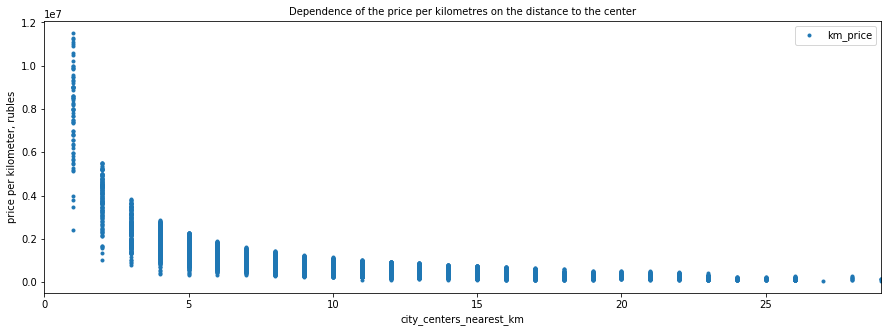

In [879]:
(spb_region_flats
     .sort_values(by='city_centers_nearest_km',ascending=True)
     .plot(x='city_centers_nearest_km',y='km_price', style='.',figsize=(15,5))
)
plt.xlabel('city_centers_nearest_km')
plt.ylabel('price per kilometer, rubles')
plt.title("Dependence of the price per kilometres on the distance to the center", fontsize=10)

Видим, что после 4-5 километров цена практически не изменяется. Обозначим центральную зону в 5 километров.

5. Проанализируем сегмент квартир в центре города. Посмотрим какие факторы влияют на стоимость таких квартир.

In [880]:
spb_region_flats_center = spb_region_flats.query('city_centers_nearest_km < 5')

- Рассмотрим площадь квартир в центре Санкт-Петербурга.

Text(0.5, 1.0, 'Total area histogram of flats in Saint P. region')

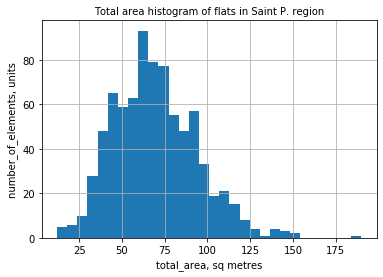

In [881]:
spb_region_flats_center['total_area'].hist(bins=30)
plt.xlabel('total_area, sq metres')
plt.ylabel('number_of_elements, units')
plt.title("Total area histogram of flats in Saint P. region", fontsize=10)


Из графика видим, что большая часть квартир площадью около 65 кв. м.

- Рассмотрим стоимость квартир.

Text(0.5, 1.0, 'Last price histogram of flats in Saint P. region')

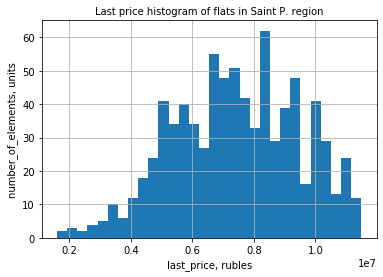

In [882]:
spb_region_flats_center['last_price'].hist(bins=30)
plt.xlabel('last_price, rubles')
plt.ylabel('number_of_elements, units')
plt.title("Last price histogram of flats in Saint P. region", fontsize=10)

Больше всего квартир стоимостью от 7 до 8.5 млн. руб.

- Проанализируем квартиры в центре Санкт-Петербурга исходя из количества комнат.

Text(0.5, 1.0, 'Number of rooms histogram of flats in Saint P. region')

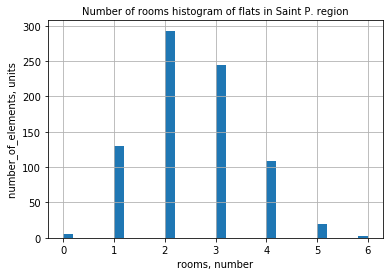

In [883]:
spb_region_flats_center['rooms'].hist(bins=30)
plt.xlabel('rooms, number')
plt.ylabel('number_of_elements, units')
plt.title("Number of rooms histogram of flats in Saint P. region", fontsize=10)

Больше всего в центре Санкт-Петербурга продают 2-х комнатные квартиры. Чуть меньше 3-х комнатных.

- Проанализируем квартиры в центре Санкт-Петербурга исходя из высоты потолков.

Text(0.5, 1.0, 'Ceiling height histogram of flats in Saint P. region')

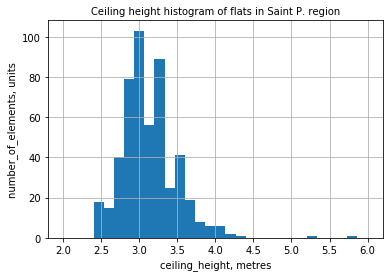

In [884]:
spb_region_flats_center['ceiling_height'].hist(bins=30, range=(2,6))
plt.xlabel('ceiling_height, metres')
plt.ylabel('number_of_elements, units')
plt.title("Ceiling height histogram of flats in Saint P. region", fontsize=10)

Чаще встречающаяся высота потолков - 3 метра.

6. Рассчитаем корреляцию. Выделим факторы, которые влияют на стоимость квартиры в центре города а также в целом на стоимость квартир в Санкт-Петербурге. 

In [885]:
correlation_in_spb_center = (spb_region_flats_center
                             .corr()
                             .sort_values('last_price', ascending=False)['last_price']
                             .reset_index()
                            )
display(correlation_in_spb_center)
#рассчитаем корреляцию для центра города, отсортируем значения и выведим нужные, т.е по столбцу с ценой

,index,last_price
0,last_price,1.000000
1,total_area,0.664618
2,living_area,0.598873
3,rooms,0.536772
4,km_price,0.480850
5,kitchen_area,0.341261
6,total_images,0.130354
7,floor,0.106137
8,sq_metres_price,0.091565
9,type_year_exposition,0.087206


In [886]:
correlation_in_spb = (spb_region_flats
                      .corr()
                      .sort_values('last_price', ascending=False)['last_price']
                      .reset_index()
                     )
display(correlation_in_spb)
#рассчитаем корреляцию для всего города, отсортируем значения и выведим нужные, т.е по столбцу с ценой

,index,last_price
0,last_price,1.000000
1,total_area,0.788426
2,living_area,0.653044
3,rooms,0.518820
4,kitchen_area,0.515326
5,km_price,0.511050
6,sq_metres_price,0.371404
7,ponds_around_3000,0.159572
8,total_images,0.152991
9,parks_around_3000,0.114913


In [887]:
total_correlation = correlation_in_spb_center.merge(correlation_in_spb, on='index', suffixes=('_spb_center', '_spb'))
total_correlation.columns = ['last_price', 'spb_center_correlation', 'spb_correlation']
display(total_correlation)

#объединим две таблицы, переименуем названия колонок

,last_price,spb_center_correlation,spb_correlation
0,last_price,1.000000,1.000000
1,total_area,0.664618,0.788426
2,living_area,0.598873,0.653044
3,rooms,0.536772,0.518820
4,km_price,0.480850,0.511050
5,kitchen_area,0.341261,0.515326
6,total_images,0.130354,0.152991
7,floor,0.106137,0.062868
8,sq_metres_price,0.091565,0.371404
9,type_year_exposition,0.087206,0.060612


У квартир как в центре так и в целом по всему Петербургу стоимость в большей степени зависит от площади квартиры, количества комнат и удаленности от центра. Чем дальше квартира тем ниже цена. В центре чуть большее значение придают наличию рядом парков и водоемов. 

Проанализируем динамику появления объявлений по годам.

Text(0.5, 1.0, 'Last price depending on the year exposition of flats in Saint P. center')

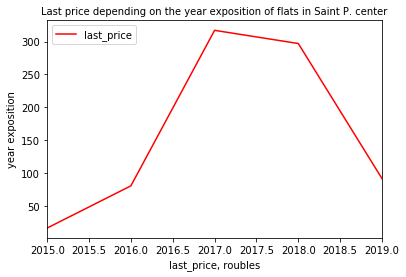

In [888]:
spb_region_flats_center.pivot_table(index ='type_year_exposition', values='last_price', aggfunc='count').plot(style='-',legend=True, color='red')
plt.xlabel('last_price, roubles')
plt.ylabel('year exposition')
plt.title("Last price depending on the year exposition of flats in Saint P. center", fontsize=10)

Text(0.5, 1.0, 'Last price depending on the year exposition of flats in Saint P. region')

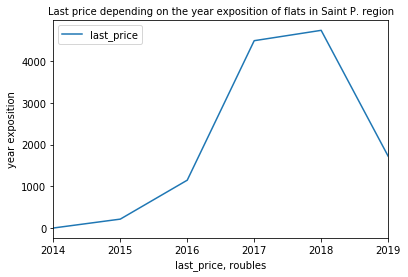

In [889]:
spb_region_flats.pivot_table(index ='type_year_exposition', values='last_price', aggfunc='count').plot(style='-',legend=True)
plt.xlabel('last_price, roubles')
plt.ylabel('year exposition')
plt.title("Last price depending on the year exposition of flats in Saint P. region", fontsize=10)

Из графиков выше видим, что всплеск продаж пришелся на 2017-2018 года. Причем для квартир в центре сразу после 2017 года начался спад. А для Санкт-Петербурга в целом количество объявлений продолжило расти до 2018 года.

## Общий вывод

Резюме:

В целом:
- Преобладают квартиры стоимостью от 3 до 4.5 млн. руб. Чаще всего продаются квартиры с площадью от 40 до 45 кв.м. Больше всего в объявлениях представлены однокомнатные и двухкомнатные квартиры. Наиболее популярны и скорее всего стандартны квартиры с высотой потолка в 2.5 метра. Чаще квартиры продаются на 3й-4й месяц после отображения объявлений.

- Чем больше площадь квартиры и количество комнат - тем она дороже. Стоимость квартир не сильно зависит от этажа. Стоит только отметить, что цена за первый этаж ниже. Наиболее "популярными" днями по закрытию объявлению являются: вторник, четверг и пятница.

- В Санкт-Петербурге наибольшее число объявлений и наивысшая цена за квадратный метр. Последним в десятке по количеству объявлений а также по средней цене за квадратный метр оказался Выборг.

По центральному району Санкт Петербурга:
- большая часть квартир площадью около 65 кв. м., стоимостью от 7 до 8.5 млн. руб., двухкомнатные, с высотой потолка около 3х метров.

У квартир как в центре так и в целом по всему Петербургу стоимость в большей степени зависит от площади квартиры, количества комнат и удаленности от центра. Чем дальше квартира тем ниже цена. В центре чуть большее значение придают наличию рядом парков и водоемов.

Всплеск продаж пришелся на 2017-2018 года. Причем для квартир в центре сразу после 2017 года начался спад. А для Санкт-Петербурга в целом количество объявлений продолжило расти до 2018 года.


